# Ford GoBike System Data Exploration
## by Aleen AlSuhaibani


## Table of Contents
<ul>
<li><a href="#PreliminaryWrangling">Preliminary Wrangling</a></li> <ul>
    <li><a href="#DataLoading">Data Loading and Assessing</a></li>
    <li><a href="#DataCleaning">Data Cleaning</a></li>
    </ul>
<li><a href="#UnivariateExploration">Univariate Exploration</a></li>
<li><a href="#BivariateExploration">Bivariate Exploration</a></li>
<li><a href="#MultivariateExploration">Multivariate Exploration</a></li>
<li><a href="#References">References</a></li>
</ul>

<a id='PreliminaryWrangling'></a>
## Preliminary Wrangling

> Ford GoBike System Lately known as "Bay Wheels" is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. <sup>1</sup> <br> In this project I will be exploring the dataset of Ford GoBike that was collected in February and March of 2019. I will start with data wrangling followed by visualizations of univariate, bivariate, and lastly multivariate explorations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='DataLoading'></a>
### Data Loading & Assessing

In [2]:
# Load ford go bike dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
# Explore top rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Dataset Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# check on missing values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

__Quality issues__<br>
<br>The dataset appears to have issues in the datatypes of the columns, in addition to the missing values.  
- The following columns need to be converted to __int__ data type instead of __float__ (start_station_id, end_station_id, and member_birth_year).
- The (start_time, end_time) columns need to be converted from being object data type __(String)__ to __(Datetime)__
- The (bike_share_for_all_trip) column should be changed from (String) to (int) with 0's for "No" and 1's for "Yes"
- Missing values in  (start_station_id, start_station_name, end_station_id, end_station_name, member_gender ,and member_birth_year )

__Tidiness issues__ <br>
<br> 
- (start_time) and (end_time) columns contains date and time, we will introduce 2 columns for the date part (start_date) and (end_date), and 2 columns for start_hour and end_hour, lastly we will introduce 1 column for the day of the trip (trip_day) 
- There need to be a column for the members age to be calculated from the member_birth_year column
- There is a need for a column holding trip duration values in minutes

<a id='DataCleaning'></a>
### Data Cleaning 

In [7]:
# creating a copy of the dataframe to be cleaned
df_clean = df.copy()

#### Quality issues

##### 1- Drop rows with missing values in (start_station_id, start_station_name, end_station_id, end_station_name, member_gender ,and member_birth_year)

#### Define
Missing values in(start_station_id, start_station_name, end_station_id, end_station_name)

#### Code

In [8]:
duplicates=df_clean[df_clean['start_station_id'].isna()].index
for indx in duplicates:
    df_clean.drop(indx, inplace=True)

In [9]:
duplicates=df_clean[df_clean['start_station_name'].isna()].index
for indx in duplicates:
    df_clean.drop(indx, inplace=True)

In [10]:
duplicates=df_clean[df_clean['end_station_id'].isna()].index
for indx in duplicates:
    df_clean.drop(indx, inplace=True)

In [11]:
duplicates=df_clean[df_clean['end_station_name'].isna()].index
for indx in duplicates:
    df_clean.drop(indx, inplace=True)

In [12]:
duplicates=df_clean[df_clean['member_birth_year'].isna()].index
for indx in duplicates:
    df_clean.drop(indx, inplace=True)

In [13]:
duplicates=df_clean[df_clean['member_gender'].isna()].index
for indx in duplicates:
    df_clean.drop(indx, inplace=True)

#### Test

In [14]:
df_clean.start_station_id.isna().sum()

0

In [15]:
df_clean.start_station_name.isna().sum()

0

In [16]:
df_clean.end_station_id.isna().sum()

0

In [17]:
df_clean.end_station_name.isna().sum()

0

In [18]:
df_clean.member_birth_year.isna().sum()

0

In [19]:
df_clean.member_gender.isna().sum()

0

##### 2- The following columns need to be converted to int data type instead of float (start_station_id, end_station_id, and member_birth_year).

#### Define 
Convert (start_station_id, end_station_id, and member_birth_year) columns from float to int

#### Code

In [20]:
# convert start_station_id from float to int
df_clean['start_station_id']= df_clean.start_station_id.astype('int')

In [21]:
# convert end_station_id from float to int
df_clean['end_station_id']= df_clean.end_station_id.astype('int')

In [22]:
# convert member_birth_year from float to int
df_clean['member_birth_year']= df_clean.member_birth_year.astype('int')

#### Test

In [23]:
df_clean['start_station_id'].head()

0     21
2     86
3    375
4      7
5     93
Name: start_station_id, dtype: int64

In [24]:
df_clean['end_station_id'].head()

0     13
2      3
3     70
4    222
5    323
Name: end_station_id, dtype: int64

In [25]:
df_clean['member_birth_year'].head()

0    1984
2    1972
3    1989
4    1974
5    1959
Name: member_birth_year, dtype: int64

##### 3- The (start_time, end_time) columns need to be converted from being object data type (String) to (Datetime)

#### Define
Convert (start_time, end_time) columns from String (object) to (Datetime)

#### Code

In [26]:
# convert start_time  from String to Datetime
df_clean['start_time']= pd.to_datetime(df['start_time'])

In [27]:
# convert  end_time from String to Datetime
df_clean['end_time']= pd.to_datetime(df['end_time'])

#### Test

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

##### 4- The (bike_share_for_all_trip) column should be changed from **(String)** to **(int)** with 0's  for "No" and 1's for "Yes"

#### Define
Convert (bike_share_for_all_trip) column from  (String) to (boolean) with 0's for "No" and 1's for "Yes"

#### Code

In [29]:
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df['bike_share_for_all_trip'] = df.bike_share_for_all_trip.map(dict(Yes=1, No=0))

#### Test

In [31]:
df.bike_share_for_all_trip.head()

0    0
1    0
2    0
3    0
4    1
Name: bike_share_for_all_trip, dtype: int64

In [32]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,1


#### Tidiness issues

##### 1- (start_time) and (end_time) columns contains date and time, we will introduce 2 columns for the date part (start_date) and (end_date), and 2 columns for start_hour and end_hour, lastly we will introduce 1 column for the day of the trip (trip_day) 

#### Define
split date from time in (start_time) and (end_time) columns and introducing 2 columns for the date part (start_date) and (end_date), as well as start_hour and end_hour to hold the hours, lastly trip_day

#### Code

In [33]:
# introducing 2 more columns for start/end dates to contain only date portion
df_clean['start_date'] = pd.to_datetime(df_clean['start_time']).dt.date
df_clean['end_date'] = pd.to_datetime(df_clean['end_time']).dt.date

# introducing 2 more columns for start/end hours to contain only hour portion
df_clean['start_hour'] = pd.to_datetime(df_clean['start_time']).dt.hour
df_clean['end_hour'] = pd.to_datetime(df_clean['end_time']).dt.hour

# introducing 2 more columns for start/end days to contain only day portion
df_clean['trip_day'] = pd.to_datetime(df_clean['start_time']).dt.dayofweek

# converting start/end times to contain only time portion
df_clean['start_time'] = pd.to_datetime(df_clean['start_time']).dt.time
df_clean['end_time'] = pd.to_datetime(df_clean['end_time']).dt.time

In [34]:
# converting day of week trip_day from int to string
df_clean['trip_day'] = df_clean['trip_day'].astype(str)

#### Test

In [35]:
df_clean.start_date.sample(7)

65504     2019-02-20
7688      2019-02-28
56772     2019-02-21
128627    2019-02-10
154483    2019-02-06
81791     2019-02-18
13532     2019-02-27
Name: start_date, dtype: object

In [36]:
df_clean.end_date.sample(7)

116403    2019-02-12
128154    2019-02-10
112852    2019-02-12
111277    2019-02-12
91716     2019-02-15
132694    2019-02-08
56401     2019-02-21
Name: end_date, dtype: object

In [37]:
df_clean.start_time.sample(7)

153231    13:18:40.524000
140816    18:36:29.877000
157590    21:21:24.336000
70025     18:25:43.437000
30297     20:45:02.900000
57641     08:09:56.496000
99679     19:13:11.250000
Name: start_time, dtype: object

In [38]:
df_clean.end_time.sample(7)

129566    09:53:12.051000
16383     08:41:56.182000
144827    11:04:43.752000
74804     09:52:49.834000
14601     11:59:20.872000
107883    13:18:13.959000
33524     11:35:44.641000
Name: end_time, dtype: object

In [39]:
df_clean.start_hour.sample(7)

47229      9
74806      9
128057    13
46068     10
63991     13
8021       8
174733    16
Name: start_hour, dtype: int64

In [40]:
df_clean.end_hour.sample(7)

152507    15
152066    16
69141     20
149719    19
3356      17
142474    17
32604     14
Name: end_hour, dtype: int64

In [41]:
df_clean.trip_day.sample(7)

21379     1
104417    3
66690     2
110360    1
88805     5
39409     5
97598     4
Name: trip_day, dtype: object

In [42]:
df_clean.trip_day.dtypes
# O stands for object which is String in python

dtype('O')

##### 2- There need to be a column for the members age to be calculated from the member_birth_year column

#### Define
Add new column to hold the members' age, and since the data was collected in 2019 we will subtract the year of birth from 2019

#### Code

In [43]:
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

#### Test

In [44]:
df_clean['member_age'].sample(7)

133351    26
163084    28
65486     48
45484     26
16696     46
137787    29
180290    36
Name: member_age, dtype: int64

In [45]:
df_clean['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [46]:
# dropping Outlier with age = 141
outlier = df_clean.query('member_age == 141').index[0]
df_clean.drop(outlier, inplace=True)

In [47]:
# Test
df_clean.query('member_age == 141')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_hour,end_hour,trip_day,member_age


##### 3- There is a need for a column holding trip duration values in minutes 

#### Define
Add new column for trip duration in minutes let the name be (duration_min)

#### Code

In [48]:
df_clean['duration_min'] = (df_clean['duration_sec']/60).round().astype(int)

#### Test

In [49]:
df_clean['duration_min'].head(7)

0     870
2    1031
3     608
4      26
5      30
6      19
7      27
Name: duration_min, dtype: int64

In [50]:
# New structure after data cleaning 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174951 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174951 non-null  int64  
 1   start_time               174951 non-null  object 
 2   end_time                 174951 non-null  object 
 3   start_station_id         174951 non-null  int64  
 4   start_station_name       174951 non-null  object 
 5   start_station_latitude   174951 non-null  float64
 6   start_station_longitude  174951 non-null  float64
 7   end_station_id           174951 non-null  int64  
 8   end_station_name         174951 non-null  object 
 9   end_station_latitude     174951 non-null  float64
 10  end_station_longitude    174951 non-null  float64
 11  bike_id                  174951 non-null  int64  
 12  user_type                174951 non-null  object 
 13  member_birth_year        174951 non-null  int64  
 14  memb

In [51]:
# Saving the cleaned data frame
df_clean.to_csv('fordGoBike.csv',index=False)

### What is the structure of your dataset?

 Ford GobBike dataset contains 18 columns and 174952 entries after cleaning, the columns are :
- duration_sec
- start_time
- end_time
- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude
- bike_id
- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip
- start_date (NEW)
- start_date (NEW)
- start_hour (NEW)
- end_hour (NEW)
- member_age (NEW)
- trip_day (NEW)
- duration_min (NEW)

### What is/are the main feature(s) of interest in your dataset?

The dataset contains very intersting features one of them is that it includes members' gender and birth date, which we can use for estimating which age group is cycling the most. <br>
As well as, the duration of the trip in seconds can be used to see the average duration of trips, thus the start station name and end station name can be used to see where most trips start or end from.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 I think start/end station name and user information such as age and gender as well as duration of the trip will be very helpful.

<a id='UnivariateExploration'></a>
## Univariate Exploration

In this section I will explore the columns of interest individually

In [52]:
# There seems to be a gender type named 'other' which does not make sense, so I am going to drop thier rows.
# Code
otherGender_rows = df_clean.query('member_gender =="Other"').index
df_clean.drop(otherGender_rows, inplace=True)

In [53]:
# Test
df_clean.query('member_gender =="Other"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_hour,end_hour,trip_day,member_age,duration_min


In [54]:
# taking another copy of the cleaned data set
df_clean.to_csv('fordGoBike.csv',index=False)

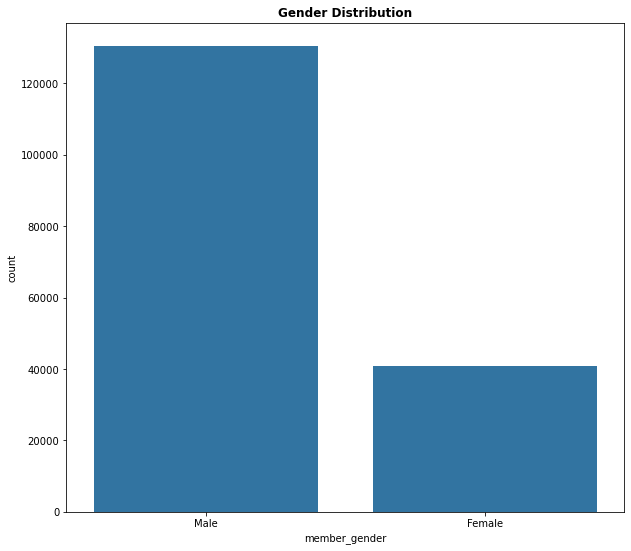

In [55]:
# Bar chart showing members' gender distribution 
base_color = sb.color_palette()[0] 
order_by_count = df_clean.member_gender.value_counts().index
plt.figure(figsize=[10, 9]);
sb.countplot(data= df_clean, x='member_gender', color = base_color, order=order_by_count);
plt.title('Gender Distribution',fontsize=12, weight='bold');

- Interestingly it appears that males are using Go Bike more than females!

In [56]:
# used to take a look of the statistics in order to arange the bins 
df_clean['duration_min'].describe()

count    171304.000000
mean         11.629115
std          26.289667
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

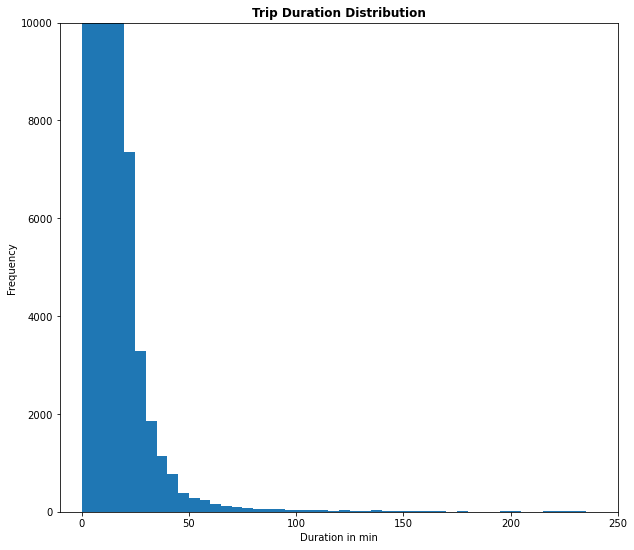

In [57]:
# plotting histogram of Trip Duration
bins = np.arange(0, df_clean['duration_min'].max()+5, 5)
plt.figure(figsize=[10, 9]);
plt.hist(data=df_clean, x='duration_min', bins=bins);
plt.axis([-10, 250, 0,10000]);
plt.title('Trip Duration Distribution',fontsize=12, weight='bold');
plt.xlabel('Duration in min');
plt.ylabel('Frequency');

- It appears that most bikers use the bikes for less than 25 minutes.

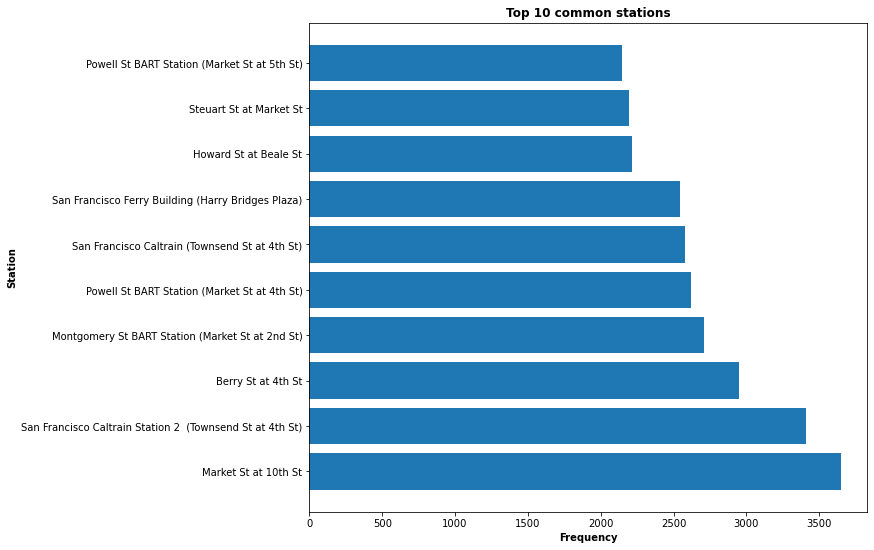

In [58]:
# Top 10 of most common stations
base_color = sb.color_palette()[0] 
yvalues= df_clean.start_station_name.value_counts().head(10).index
xvalues= [3649,3408,2952,2711,2620,2577,2541,2216,2191,2144]
plt.figure(figsize=[10, 9]);
plt.barh(yvalues,xvalues);
plt.title('Top 10 common stations',fontsize=12, weight='bold');
plt.xlabel('Frequency',fontsize=10,weight='bold');
plt.ylabel('Station',fontsize=10,weight='bold');


- It appears that the most common station is _Market St Station_ followed by _San Francisco Caltrain Station 2_ and the third most common station is _Berry St Station_

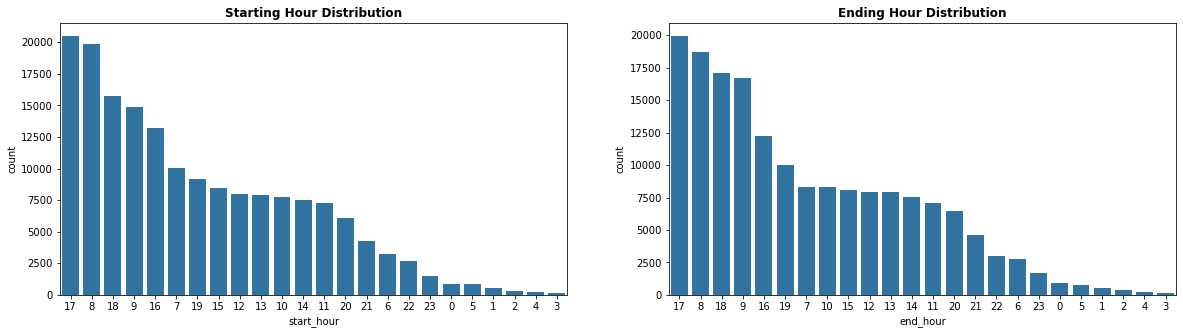

In [59]:
# plotting a distribution of start hours as well as end hours
base_color = sb.color_palette()[0] 
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1) 
order_by_count = df_clean.start_hour.value_counts().index
sb.countplot(data= df_clean, x='start_hour', color = base_color, order=order_by_count);
plt.title('Starting Hour Distribution',fontsize=12, weight='bold');

plt.subplot(1, 2, 2) 
order_by_count = df_clean.end_hour.value_counts().index
sb.countplot(data= df_clean, x='end_hour', color = base_color, order=order_by_count);
plt.title('Ending Hour Distribution',fontsize=12, weight='bold');

- From the figures above it appears that the members are using the bikes for less than hour, and most commonly at 5pm - 6pm, and 8 am, which implies that they are mostly using it to commute to or from work.

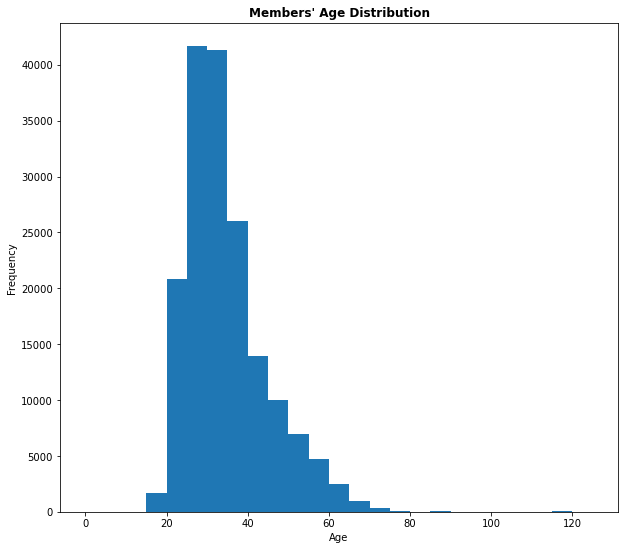

In [60]:
# plotting a distribution for the members' ages

bins = np.arange(0, df_clean['member_age'].max()+10, 5)
plt.figure(figsize=[10, 9]);
plt.hist(data=df_clean, x='member_age', bins=bins);
plt.title('Members\' Age Distribution',fontsize=12, weight='bold');
plt.xlabel('Age');
plt.ylabel('Frequency');

- As the above histogram shows, it seems that most of the members are under 50 years old.

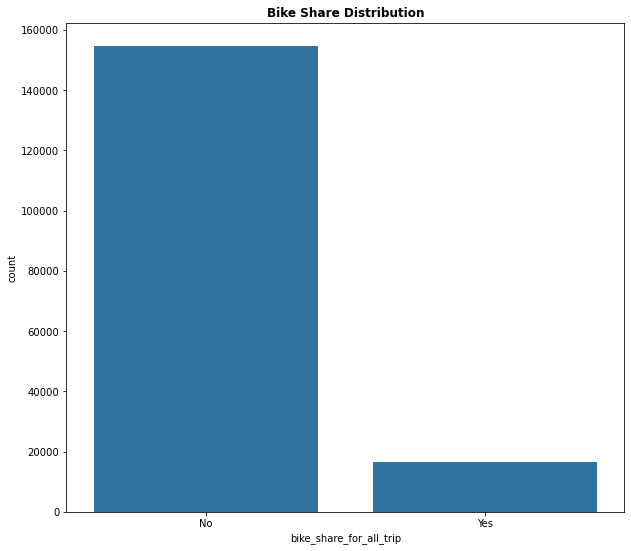

In [61]:
# plotting a distribution showing the the frequency of bike_share_for_all_trip
base_color = sb.color_palette()[0] 
order_by_count = df_clean.bike_share_for_all_trip.value_counts().index
plt.figure(figsize=[10, 9]);
sb.countplot(data= df_clean, x='bike_share_for_all_trip', color = base_color, order=order_by_count);
plt.title('Bike Share Distribution',fontsize=12, weight='bold');

- As the bar chart above shows, there are a huge difference between bike shareable trips and non-shareable trips as over 140,000 are not bike shared.

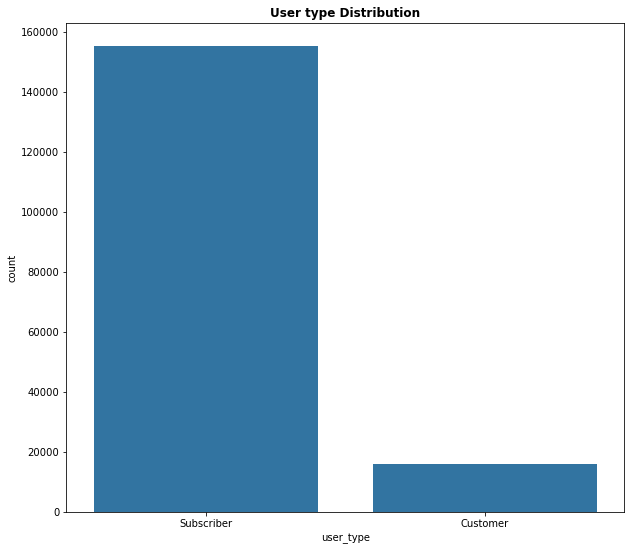

In [62]:
# plotting a distribution showing the frequency of subscribers to customers in the dataset

base_color = sb.color_palette()[0] 
order_by_count = df_clean.user_type.value_counts().index
plt.figure(figsize=[10, 9]);
sb.countplot(data= df_clean, x='user_type', color = base_color, order=order_by_count);
plt.title('User type Distribution',fontsize=12, weight='bold');

- There is a clear distinguished difference between Subscribers and Customers as the subscribers portion is higher than the customers

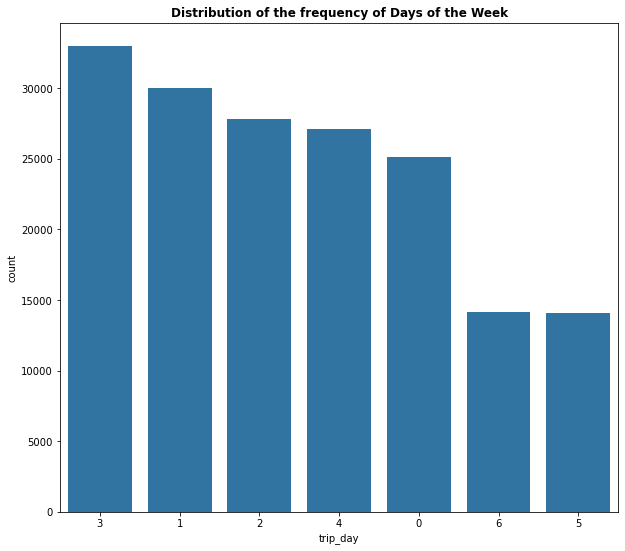

In [63]:
# plotting a distribution showing the frequency of days of the week in the dataset

base_color = sb.color_palette()[0] 
order_by_count = df_clean.trip_day.value_counts().index
plt.figure(figsize=[10, 9]);
sb.countplot(data= df_clean, x='trip_day', color = base_color, order=order_by_count);
plt.title('Distribution of the frequency of Days of the Week',fontsize=12, weight='bold');

- In the above bar chart I encoded the days of week starting with 0 for Monday and ending with 6 for Sunday. <br>
Apparently, people tend to use the bikes more on the weekdays than weekends.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 From the above distributions it appears that the male proportoin is higher than the females in addition to that younger people from 20-40 seems to be using the bikes the most and most users are subscribers rather than customers <br><br>
 Most trips lasts for less than 30 minutes and the most common station is _"Market St Station"_ followed by _"San Francisco Caltrain Station 2"_ and the third most common station is _"Berry St Station"_, it appears that most trips are taken at 8 am in the morning, and 5-6 pm in the evening.<br><br>
 I did not need to do any transformations but I did some data cleaning operations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

 There could be unusual distribution if the data were not cleaned or tidied, but thankfully due to my efforts in cleaning the data and tiding it the results appeard neatly.<br><br>
 I dropped the rows with missing values, changed the data types of many columns from float to int, and from string(Object) to datetime, in addition to introducing new columns such as start_date, end_date, start_hour, end_hour, and member_age. I did the above fixes in order to ease the visualization process and produce high quality presentations of data.

<a id='BivariateExploration'></a>
## Bivariate Exploration

In [64]:
# take a look at the statistics in order to organize the bins
df_clean['start_hour'].describe()

count    171304.000000
mean         13.451571
std           4.733724
min           0.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: start_hour, dtype: float64

In [65]:
# take a look at the statistics in order to organize the bins
df_clean['member_age'].describe()

count    171304.000000
mean         34.160025
std          10.112818
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         119.000000
Name: member_age, dtype: float64

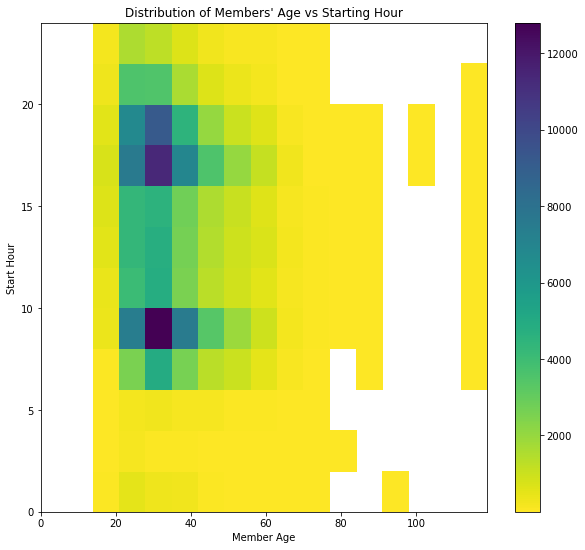

In [66]:
bin_x = np.arange(0,df_clean['start_hour'].max()+2,2)
bin_y = np.arange(0,df_clean['member_age'].max()+7, 7)
plt.figure(figsize=[10, 9]);
plt.hist2d(data=df_clean,x='member_age', y='start_hour', cmin=0.5, cmap='viridis_r', bins= [bin_y,bin_x]);
plt.colorbar();
plt.title('Distribution of Members\' Age vs Starting Hour' );
plt.xlabel('Member Age');
plt.ylabel('Start Hour');

- From the above heat map, it appears that most young people from 20-40 are using the bikes in the period of between 7-9 AM and from 5-8 PM mostly, which is obvious because it is associated with the rush hours of going to/from work or university.

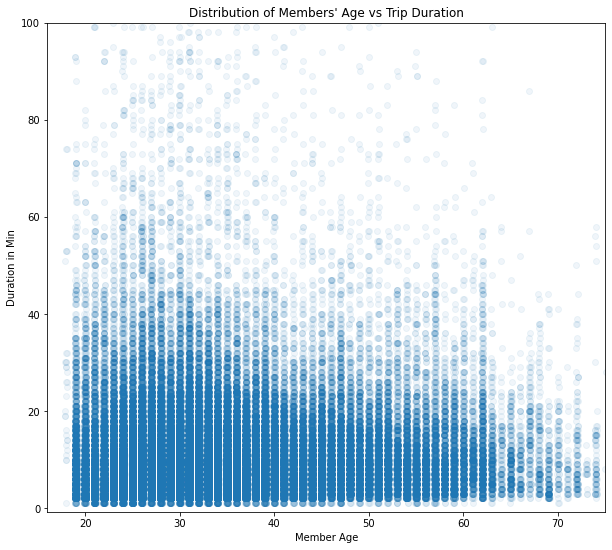

In [67]:
plt.figure(figsize=[10, 9]);
sb.regplot(data=df_clean,x='member_age', y='duration_min',fit_reg = False ,x_jitter=0.1, scatter_kws={'alpha':1/15});
plt.axis([16, 75, -0.75, 100])
plt.title('Distribution of Members\' Age vs Trip Duration');
plt.xlabel('Member Age');
plt.ylabel('Duration in Min');

- From the above scatter plot, it appears that young people from 20-40 tend to take longer rides than older people.

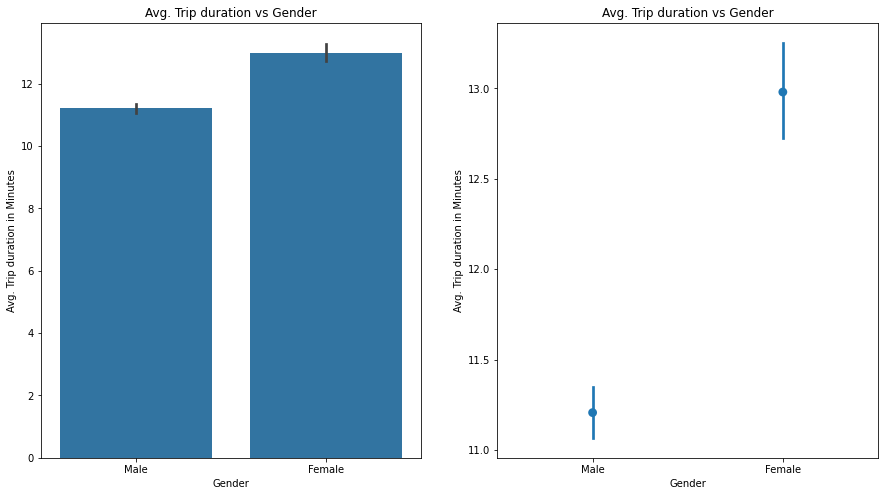

In [68]:
# plotting a bar chart showing Avg. Trip duration vs User type

plt.figure(figsize=[15,8])
plt.subplot(1,2,1);
sb.barplot(data=df_clean, x='member_gender', y='duration_min', color=base_color)
plt.title('Avg. Trip duration vs Gender')
plt.ylabel('Avg. Trip duration in Minutes');
plt.xlabel('Gender');

plt.subplot(1,2,2);
sb.pointplot(data=df_clean, x='member_gender', y='duration_min', color=base_color,linestyles="")
plt.title('Avg. Trip duration vs Gender')
plt.ylabel('Avg. Trip duration in Minutes');
plt.xlabel('Gender');

- It appears from the above charts that females tend to take longer rides in comparison with males.

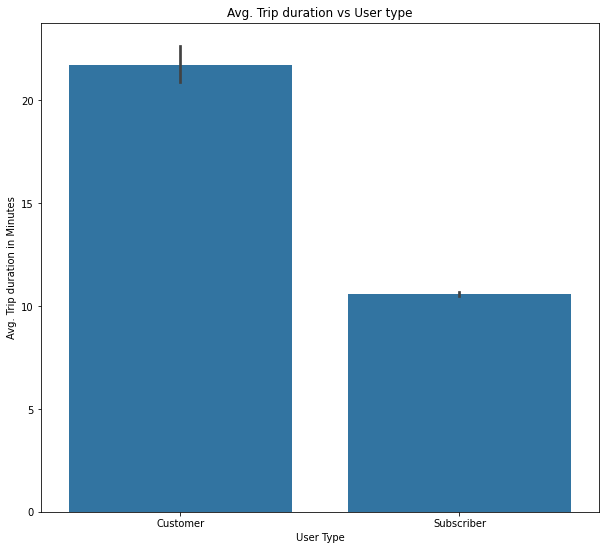

In [69]:
# plotting a bar chart showing Avg. Trip duration vs User type
base_color = sb.color_palette()[0]
plt.figure(figsize=[10, 9]);
sb.barplot(data=df_clean, x='user_type', y='duration_min', color=base_color)
plt.title('Avg. Trip duration vs User type')
plt.ylabel('Avg. Trip duration in Minutes');
plt.xlabel('User Type');

- It appears that customers have longer trip durations in comparison with subscribers. <br>
For an average of approximately 20 minutes for Customers and an average of 10 minutes for Subscribers

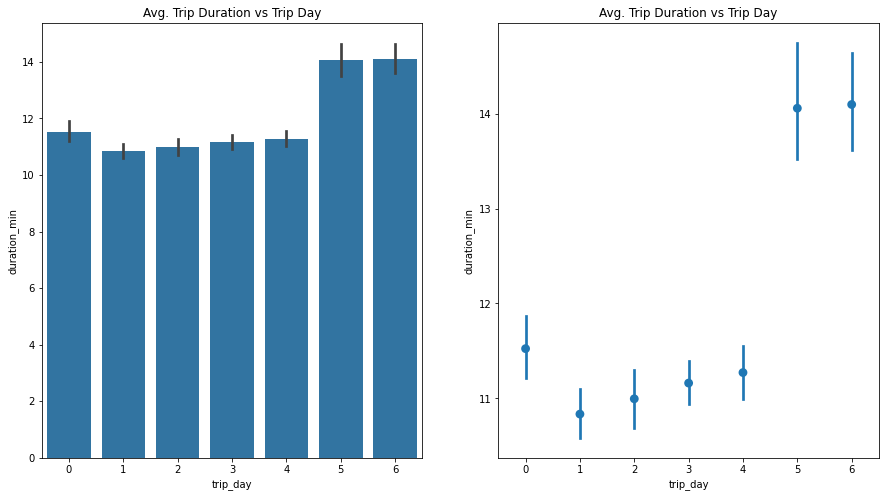

In [70]:
plt.figure(figsize=[15,8])
order= ['0','1','2','3','4','5','6']

plt.subplot(1,2,1);
plt.title('Avg. Trip Duration vs Trip Day');
sb.barplot(data=df_clean,x='trip_day',y='duration_min', color=base_color,order=order);


plt.subplot(1,2,2)
sb.pointplot(data=df_clean,x='trip_day',y='duration_min', color=base_color, linestyles="", order=order);
plt.title('Avg. Trip Duration vs Trip Day');


- Interestingly it appears that people tend to take long rides in the weekend when compared to weekdays. <br> Weekend rides have an average of 14 minutes while Weekdays are about 11 minutes average.

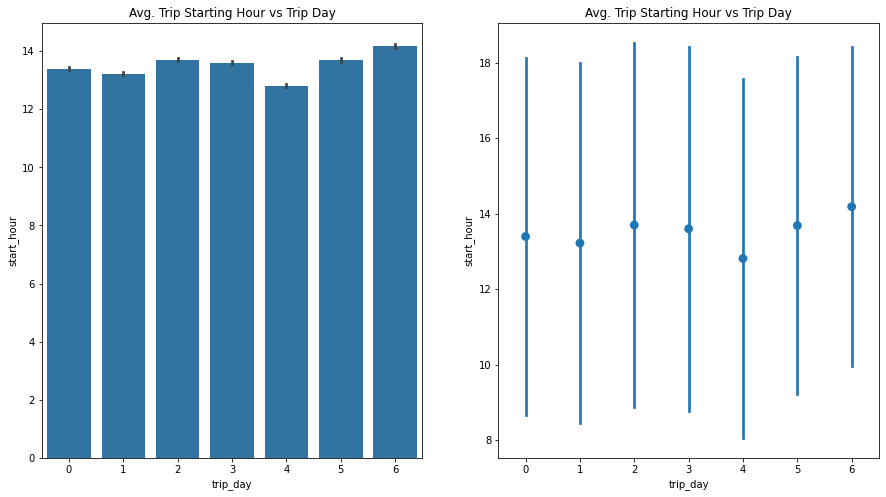

In [71]:
plt.figure(figsize=[15,8])
order= ['0','1','2','3','4','5','6']

plt.subplot(1,2,1);
plt.title('Avg. Trip Starting Hour vs Trip Day');
sb.barplot(data=df_clean,x='trip_day',y='start_hour', color=base_color,order=order);


plt.subplot(1,2,2)
sb.pointplot(data=df_clean,x='trip_day',y='start_hour', color=base_color,ci='sd' ,linestyles="", order=order);
plt.title('Avg. Trip Starting Hour vs Trip Day');

- There is no clear difference between the starting hour of trips in the weekend or weekdays, but it appears that the average starting hour is around 1 PM.

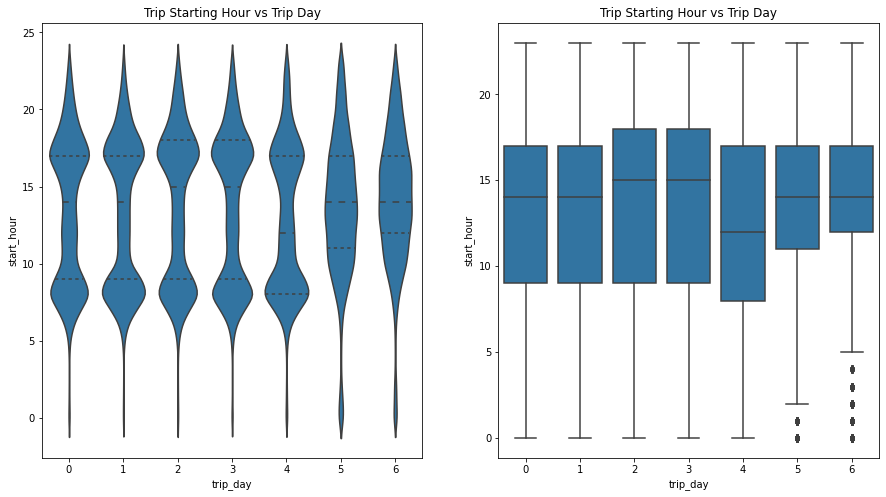

In [72]:
plt.figure(figsize=[15,8])
order= ['0','1','2','3','4','5','6']

plt.subplot(1,2,1);
plt.title('Trip Starting Hour vs Trip Day');
sb.violinplot(data=df_clean,y='start_hour',x='trip_day', color=base_color, inner='quartile', order=order);


plt.subplot(1,2,2)
sb.boxplot(data=df_clean,y='start_hour',x='trip_day', color=base_color,order=order);
plt.title('Trip Starting Hour vs Trip Day');


- as the above charts show, the median of the starting hours for week days starting from Monday-Thursday appears to be the same which equals to 2-3 pm, while the median drops significantly on Friday and equals to 12 pm, while on weekends is the equals to 3 pm

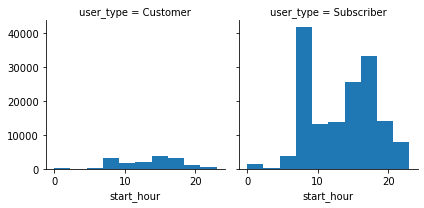

In [73]:
user_classes = ['Customer', 'Subscriber']
userclasses = pd.api.types.CategoricalDtype(ordered=True, categories=user_classes)
df_clean['user_type'] = df_clean['user_type'].astype(userclasses);

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df_clean, col = 'user_type')
g.map(plt.hist, "start_hour");

- Since Subscribers take the most of the dataset, we can see clearly from their histogram that most of them are using the bikes before 10am, while the customers histogram does not show clearly which is higher than the other.

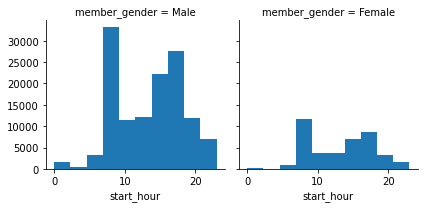

In [74]:
user_classes = ['Male','Female']
userclasses = pd.api.types.CategoricalDtype(ordered=True, categories=user_classes)
df_clean['member_gender'] = df_clean['member_gender'].astype(userclasses);

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df_clean, col = 'member_gender')
g.map(plt.hist, "start_hour");

- Even though the proportion of males and females in the dataset are different, the above histograms shows similar peaks between males and females starting hour, which have a peak between 8-9 am.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Well from the above observations it appears that there is a negative relationship between the age and trip duration which means that younger people tend to take longer trips in comparison to older people. <br>
In addition, it appears that customers tend to take longer trips on averge when compared to subscribers.<br>


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> What I found interesting is that people tend to take long rides on the weekends when compared to weekdays. 
Weekend rides have an average of 14 minutes while Weekdays are about 11 minutes average.

<a id='MultivariateExploration'></a>
## Multivariate Exploration

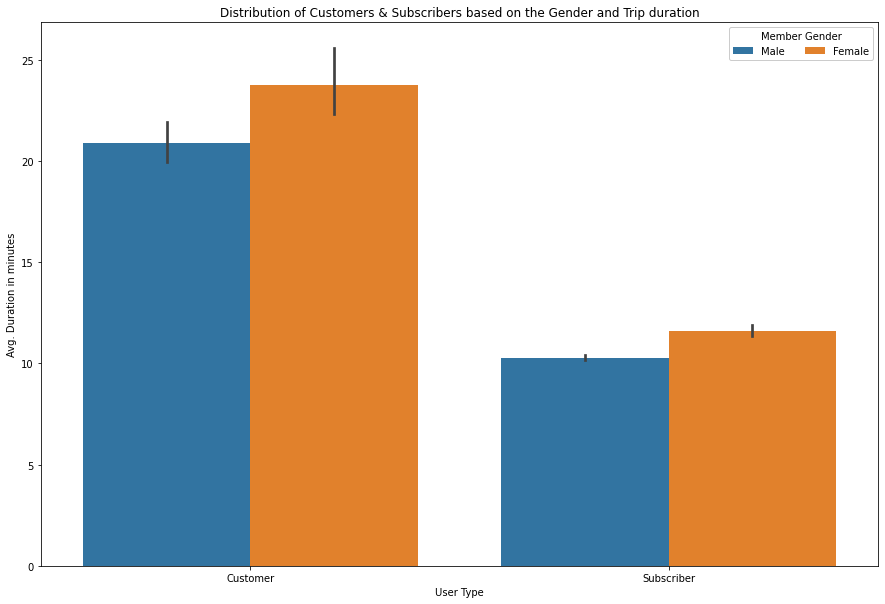

In [106]:
plt.figure(figsize=[15, 10]);
ax = sb.barplot(data = df_clean, x = 'user_type', y = 'duration_min', hue = 'member_gender')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Member Gender');
plt.xlabel('User Type');
plt.ylabel('Avg. Duration in minutes');
plt.title('Distribution of Customers & Subscribers based on the Gender and Trip duration');

- From the above distribution we can see that female customers & subscribers tend to take long rides in comparison with male customers & subscribers.

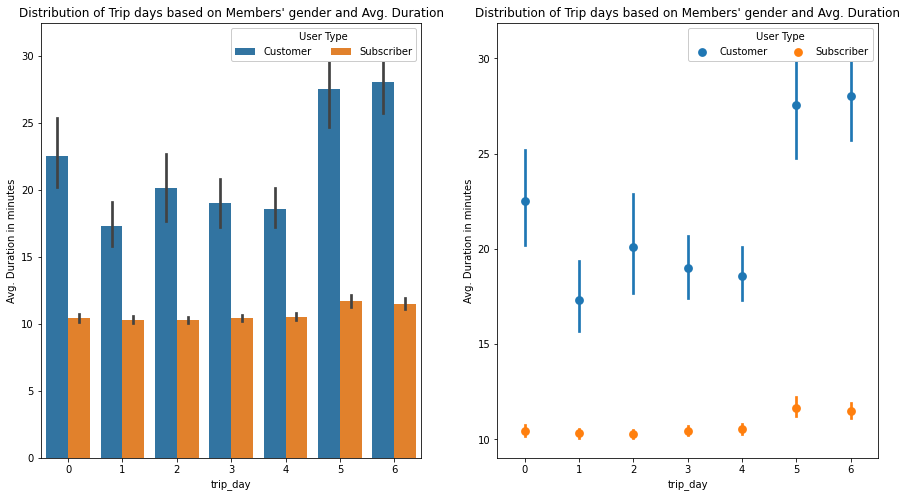

In [108]:
plt.figure(figsize=[15,8])
order= ['0','1','2','3','4','5','6']

plt.subplot(1,2,1);
plt.title('Distribution of Trip days based on Members\' gender and Avg. Duration');
ax=sb.barplot(data=df_clean,x='trip_day',y='duration_min',order=order, hue='user_type');
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'User Type');
plt.ylabel('Avg. Duration in minutes');

plt.subplot(1,2,2)
axx=sb.pointplot(data=df_clean,x='trip_day',y='duration_min',linestyles="", order=order,hue='user_type');
axx.legend(loc = 1, ncol = 3, framealpha = 1, title = 'User Type');
plt.title('Distribution of Trip days based on Members\' gender and Avg. Duration');
plt.ylabel('Avg. Duration in minutes');


- From the above distribution, We can observe a significant difference between Customers and Subcribers, subscribers usage for bicycles tends to follow a steady pattern on weekdays and having a slight peak on weekends.<br> On the other hand, customer usage appears to be unpredictable on weekdays in comparison to the weekends having a high peak  that average trips could take about 27 minutes long.

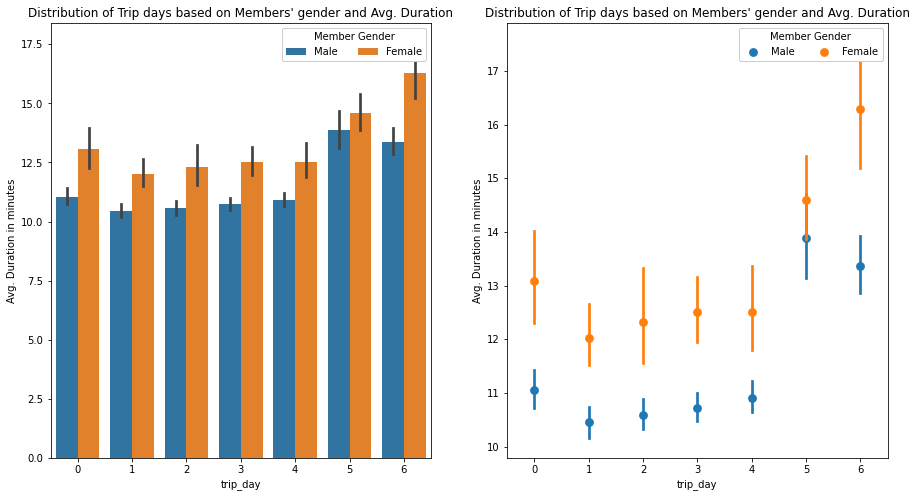

In [105]:
plt.figure(figsize=[15,8])
order= ['0','1','2','3','4','5','6']

plt.subplot(1,2,1);
plt.title('Distribution of Trip days based on Members\' gender and Avg. Duration');
ax=sb.barplot(data=df_clean,x='trip_day',y='duration_min',order=order, hue='member_gender');
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Member Gender');
plt.ylabel('Avg. Duration in minutes');

plt.subplot(1,2,2)
axx=sb.pointplot(data=df_clean,x='trip_day',y='duration_min' ,linestyles="", order=order,hue='member_gender');
axx.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Member Gender');
plt.title('Distribution of Trip days based on Members\' gender and Avg. Duration');
plt.ylabel('Avg. Duration in minutes');


- From the above distributions we can see that females and males tend to take longer rides in the weekend especially Sunday for females and Saturday for males.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We observed that both female & male customers tend to take long rides in comparison with female & male subscribers.<br> As well as, that females and males tend to take longer rides in the weekend especially Sunday for females and Saturday for males.

### Were there any interesting or surprising interactions between features?

> Yes, it appears that subscribers usage for bicycles have a steady pattern on the weekdays and a slight peak on the weekends.<br> On the other hand, customer usage appears to be unpredictable on weekdays in comparison to the weekends having a high peak that average trips could take about 27 minutes long.

<a id='References'></a>
## References
1- <a href='https://en.wikipedia.org/wiki/Bay_Wheels'> Bay Wheels </a>